### Data collection

In [1]:
import yfinance as yf

# Define the stock ticker for Coca-Cola
ticker = "LULU"

# Fetch maximum available historical data
lululemon_data = yf.download(ticker, period="max")

# Display first and last available dates
print("First available date:", lululemon_data.index[0])
print("Last available date:", lululemon_data.index[-1])

# Save data to CSV (optional)
lululemon_data.to_csv("Lululemon_Historical_Data.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

First available date: 2007-07-27 00:00:00
Last available date: 2025-04-11 00:00:00


### Data preprocessing

In [117]:
import pandas as pd
df = pd.read_csv('Lululemon_Historical_Data.csv')
df = df.iloc[2:].reset_index(drop=True)
df = df.rename(columns={'Price':'Date'})
df.head()

,Date,Close,High,Low,Open,Volume
0,2007-07-27,14.0,14.319999694824219,12.460000038146973,12.5,29257200
1,2007-07-30,14.989999771118164,15.925000190734863,14.180000305175781,14.430000305175781,5767200
2,2007-07-31,16.06999969482422,17.084999084472656,15.104999542236328,16.0,4441600
3,2007-08-01,15.539999961853027,16.625,15.199999809265137,16.489999771118164,3063600
4,2007-08-02,16.524999618530273,16.915000915527344,15.989999771118164,16.0,1969400


In [4]:
!pip install ta

In [119]:
import pandas as pd
import numpy as np
import ta
import talib as tal

# Assuming you already have 'df' with columns: ['Open', 'High', 'Low', 'Close', 'Volume']

# 1. RSI (Relative Strength Index)
# RSI tells you whether a stock is overbought or oversold.
df['RSI']=tal.RSI(df['Close'],timeperiod=14)

# 2. MACD (Moving Average Convergence Divergence)
# The MACD line and signal line track momentum. The difference between them highlights the strength and direction of that momentum.
macd = ta.trend.MACD(close=df['Close'])
df['macd_diff'] = macd.macd() - macd.macd_signal()

# 3. Bollinger Bands
# %B tells you where the price is relative to its Bollinger Bands (a volatility-based envelope).
df['Close'] = pd.to_numeric(df['Close'], errors='coerce') # Ensure 'Close' is numeric
upper, middle, lower = tal.BBANDS(df['Close'], timeperiod=14)
df['bb_percent'] = (df['Close'] - lower) / (upper - lower)

# Check the dataframe with the new features
print(df.head())
df.isna().sum()

         Date   Close                High                 Low  \
0  2007-07-27  14.000  14.319999694824219  12.460000038146973   
1  2007-07-30  14.990  15.925000190734863  14.180000305175781   
2  2007-07-31  16.070  17.084999084472656  15.104999542236328   
3  2007-08-01  15.540              16.625  15.199999809265137   
4  2007-08-02  16.525  16.915000915527344  15.989999771118164   

                 Open    Volume  RSI  macd_diff  bb_percent  
0                12.5  29257200  NaN        NaN         NaN  
1  14.430000305175781   5767200  NaN        NaN         NaN  
2                16.0   4441600  NaN        NaN         NaN  
3  16.489999771118164   3063600  NaN        NaN         NaN  
4                16.0   1969400  NaN        NaN         NaN  


Date           0
Close          0
High           0
Low            0
Open           0
Volume         0
RSI           14
macd_diff     33
bb_percent    13
dtype: int64

In [120]:
df = df.iloc[33:,1:]
df.isna().sum()
df

,Close,High,Low,Open,Volume,RSI,macd_diff,bb_percent
33,17.514999,18.364999771118164,17.415000915527344,18.360000610351562,563400,56.800188,0.009638,0.551190
34,17.090000,17.799999237060547,16.75,17.364999771118164,887400,53.363397,-0.051838,0.393008
35,17.355000,17.399999618530273,16.670000076293945,17.399999618530273,673600,55.184252,-0.074966,0.468695
36,18.100000,18.114999771118164,17.25,17.350000381469727,656200,59.921797,-0.042043,0.750459
37,19.665001,20.18000030517578,18.149999618530273,18.375,3555600,67.656622,0.076712,1.167239
...,...,...,...,...,...,...,...,...
4452,265.000000,273.6499938964844,246.44000244140625,255.72000122070312,4203800,27.995406,-4.830259,0.184406
4453,247.610001,270.4100036621094,243.74000549316406,269.4100036621094,3367900,24.263514,-5.261745,0.118132
4454,273.839996,287.2099914550781,242.4499969482422,244.00999450683594,6278000,37.744032,-3.406415,0.343557
4455,256.619995,262.8900146484375,247.9199981689453,262.8900146484375,3712500,33.525198,-2.980125,0.249830


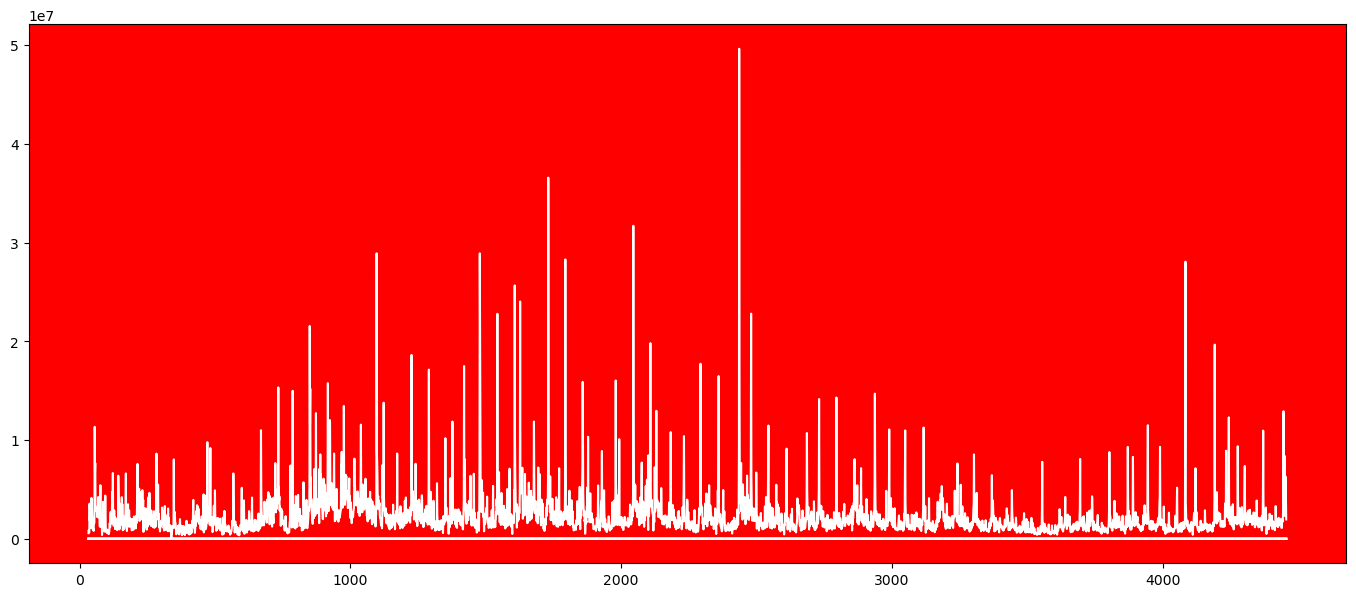

In [121]:
import matplotlib.pyplot as plt
df1=df.iloc[:,1:]
dfg=df1.astype(float)
plt.figure(figsize=(17,7))
ax=plt.gca()
ax.set_facecolor('red')
plt.plot(dfg.index, dfg.values, linestyle='-',color='white')
plt.show()

### Plotting moving averages of 100 days

In [26]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4452    357.7113
4453    357.0028
4454    356.5322
4455    355.8154
4456    355.1231
Name: Close, Length: 4457, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

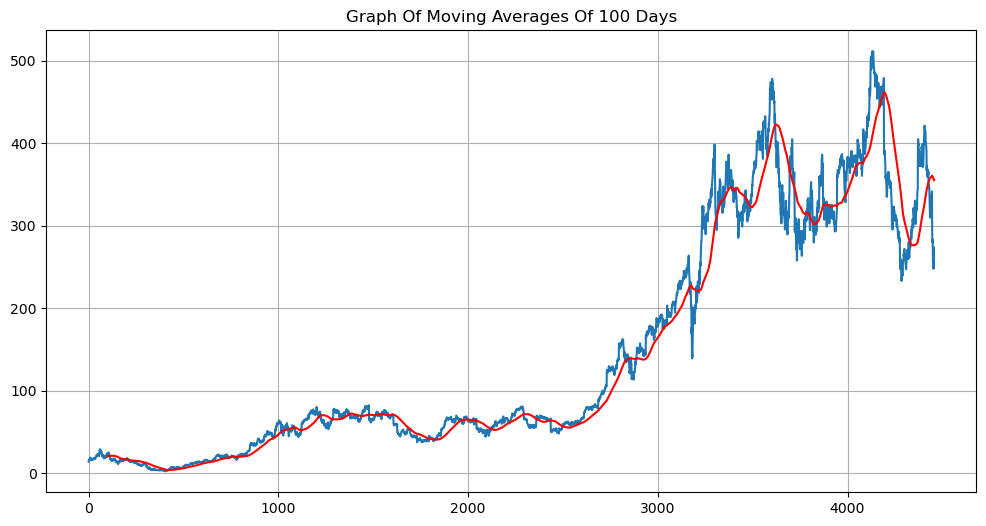

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

### Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

Text(0.5, 1.0, '200 day moving average vs 100 day moving average')

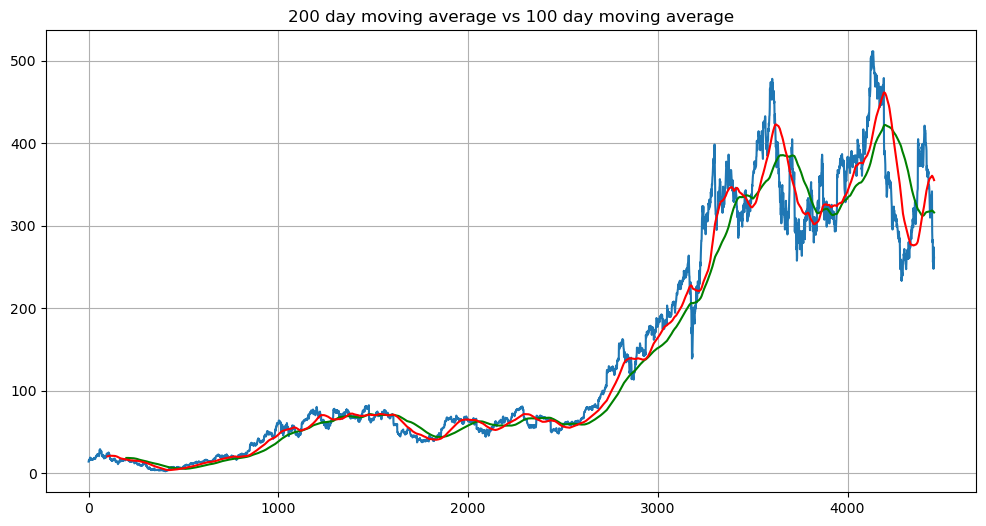

In [29]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')
plt.grid(True)
plt.title('200 day moving average vs 100 day moving average')

In [113]:
df.shape

(4358, 6)

### Splitting data into train and test

In [122]:
train_len = int(len(df)*0.70)
test_len = len(df)-train_len
print(train_len,test_len,len(df))
train = df.iloc[:train_len+1,:]
test = df.iloc[train_len+1:,:]


3096 1328 4424


In [123]:
train.head()
# train.dropna(axis=0,inplace=True)
print(train.isna().sum())
# len(train)

Close         0
High          0
Low           0
Open          0
Volume        0
RSI           0
macd_diff     0
bb_percent    0
dtype: int64


In [124]:
test.head()
test.isna().sum()

Close         0
High          0
Low           0
Open          0
Volume        0
RSI           0
macd_diff     0
bb_percent    0
dtype: int64

### Using Min Max scaling for normalization of dataset

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_to_scale= ['Close', 'High',	'Low',	'Open',	'Volume',	'RSI',	'macd_diff',	'bb_percent']
train_scaled = scaler.fit_transform(train[features_to_scale])
test_scaled = scaler.transform(test[features_to_scale])
print(np.isnan(train_scaled).sum())
print(np.isnan(test_scaled).sum())

0
0


In [126]:
lookback = 50

def lookback_window(data,lookback,target_index=0):
    X = []
    y = []
    for i in range(lookback,len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i,target_index])
    return np.array(X), np.array(y)
x_train, y_train = lookback_window(train_scaled, lookback, target_index=0)
x_test, y_test = lookback_window(test_scaled, lookback, target_index=0)

In [127]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3047, 50, 8), (3047,), (1277, 50, 8), (1277,))

NaNs in x_train: 0
NaNs in y_train: 0
NaNs in x_test: 0
NaNs in y_test: 0
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Pred shape: (1277, 1)
NaNs in pred: 1277


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50, 50)         │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 540,485 (2.06 MB)

 Trainable params: 180,161 (703.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 360,324 (1.37 MB)

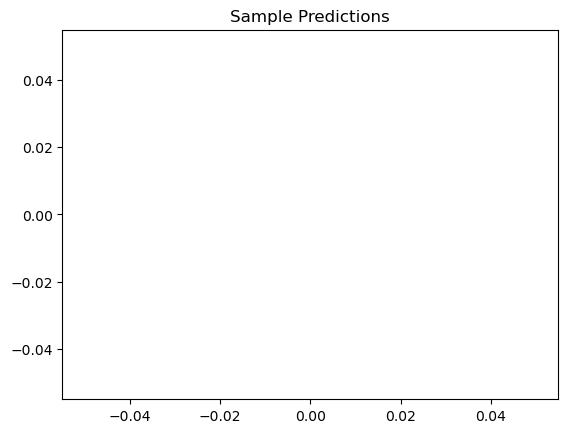

In [129]:
# Check for NaNs in training data
print("NaNs in x_train:", np.isnan(x_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in x_test:", np.isnan(x_test).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

# Check shape of predictions
preds = model.predict(x_test)
print("Pred shape:", preds.shape)
print("NaNs in pred:", np.isnan(preds).sum())

# Check if model was trained
model.summary()

# Try a quick plot
plt.plot(preds[:50])
plt.title("Sample Predictions")
plt.show()


### Model building

In [130]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [131]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,input_shape = (x_train.shape[1], 8)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [132]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50, 50)         │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 50, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,161 (703.75 KB)

 Trainable params: 180,161 (703.75 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0026 - mean_absolute_error: 0.0339
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0019 - mean_absolute_error: 0.0288
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0022 - mean_absolute_error: 0.0310
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0025 - mean_absolute_error: 0.0329
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0020 - mean_absolute_error: 0.0287
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0018 - mean_absolute_error: 0.0277
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0015 - mean_absolute_error: 0.0254
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0015 - mean_absolute_error: 0.0250
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0016 - mean_absolute_error: 0.0271
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0019 - mean_absolute_error: 0.0282
Epoch 11/100
96/96 ━━━━━━━━━━

In [135]:
model.save('keras_model2.h5')

In [136]:
test_scaled.shape

(1327, 8)

### Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the testing dataset

In [137]:
past_100_days = train.tail(100)
final_df = pd.concat([past_100_days,test],axis=0).reset_index(drop=True)

In [139]:
# final_df.drop(['Date'],axis=1,inplace=True)
final_df.head()

,Close,High,Low,Open,Volume,RSI,macd_diff,bb_percent
0,182.820007,186.0,180.94000244140625,185.35000610351562,950700,47.515503,-1.090231,0.349803
1,178.820007,182.0500030517578,177.66000366210938,182.0,965400,42.673480,-1.197716,0.217427
2,179.589996,183.72000122070312,176.4199981689453,177.6199951171875,1677500,43.859460,-1.156990,0.283369
3,174.679993,176.86000061035156,174.00999450683594,176.0500030517578,1770800,38.403463,-1.385349,0.134973
4,175.440002,176.35000610351562,172.44000244140625,176.1999969482422,1136600,39.654804,-1.405390,0.210678


In [140]:
final_df.shape

(1427, 8)

In [141]:
input_data = scaler.fit_transform(final_df)

### Testing the model

In [142]:
x_test1 = []
y_test1 = []
for i in range(100, input_data.shape[0]):
   x_test1.append(input_data[i-100: i])
   y_test1.append(input_data[i, 0])
x_test1, y_test1 = np.array(x_test1), np.array(y_test1)

In [143]:
print(x_test1.shape)
print(y_test1.shape)

(1327, 100, 8)
(1327,)


### Making prediction and plotting the graph of predicted vs actual values

In [144]:
y_pred1 = model.predict(x_test1)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [145]:
y_pred1.shape

(1327, 1)

In [146]:
y_test1

array([0.25365958, 0.25156456, 0.25905829, ..., 0.36222502, 0.31597324,
       0.32781821])

In [147]:
y_pred1

array([[0.25850868],
       [0.2595037 ],
       [0.2603885 ],
       ...,
       [0.3454654 ],
       [0.33842713],
       [0.33248562]], dtype=float32)

In [148]:
scaler.scale_

array([2.68593367e-03, 2.66134387e-03, 2.63428265e-03, 2.64466310e-03,
       3.61437509e-08, 1.52734634e-02, 5.36239005e-02, 6.14024552e-01])

In [150]:
scale_factor = 1/0.00041967
y_pred1 = y_pred1 * scale_factor
y_test1 = y_test1 * scale_factor

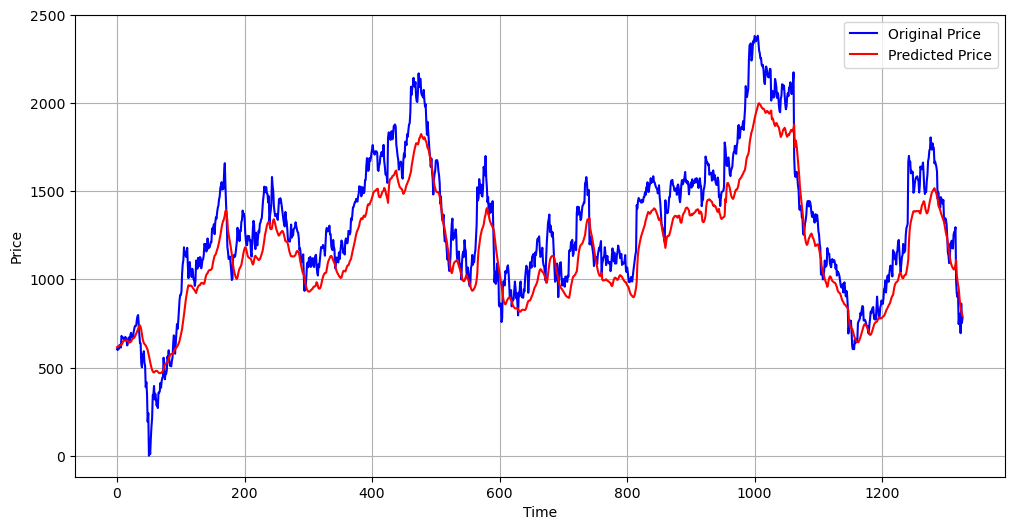

In [151]:
plt.figure(figsize = (12,6))
plt.plot(y_test1, 'b', label = "Original Price")
plt.plot(y_pred1, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Model evaluation

In [153]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test1, y_pred1)
mae_percentage = (mae / np.mean(y_test1)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 11.72%


In [154]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test1

# Predicted values
predicted = y_pred1

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8035013470267642


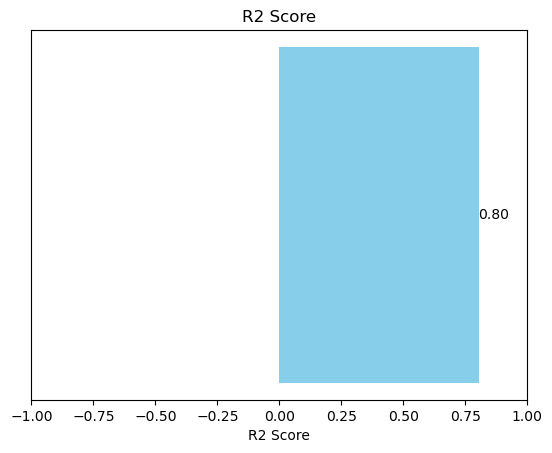

In [155]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

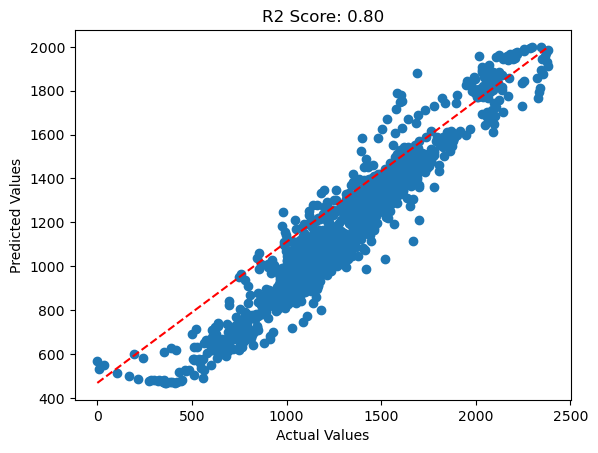

In [156]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()